In [48]:
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers



In [50]:
df = pd.read_csv("Train Data.csv")

In [51]:
df.head()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,duration,campaign,passdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,51,retired,married,primary,no,229,yes,no,5,may,353,1,-1,0,unknown,0
4,57,blue-collar,married,primary,no,52,yes,no,5,may,38,1,-1,0,unknown,0


In [52]:
df.shape

(40508, 16)

In [ ]:
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.25, random_state = 42)


In [71]:
X_train, Y_train = generate_data(n_train=200,train_only=True, n_features=2)

# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

# store outliers and inliers in different numpy arrays
x_outliers, x_inliers = get_outliers_inliers(X_train,Y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)

#separate the two features and use it to plot the data 
F1 = X_train[:,[0]].reshape(-1,1)
F2 = X_train[:,[1]].reshape(-1,1)


# create a meshgrid 
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# scatter plot 
plt.scatter(F1,F2)
plt.xlabel('F1')
plt.ylabel('F2') 


IndexError: index 2 is out of bounds for axis 1 with size 2

In [53]:
df.dtypes

age            int64
job           object
marital       object
education     object
connect       object
balance        int64
landline      object
smart         object
last_day       int64
last_month    object
duration       int64
campaign       int64
passdays       int64
previous       int64
poutcome      object
target         int64
dtype: object

In [54]:
np.mean(df.target)

0.11585365853658537

In [57]:
df.isna().sum()

age           0
job           0
marital       0
education     0
connect       0
balance       0
landline      0
smart         0
last_day      0
last_month    0
duration      0
campaign      0
passdays      0
previous      0
poutcome      0
target        0
dtype: int64

Text(0, 0.5, 'Data type')

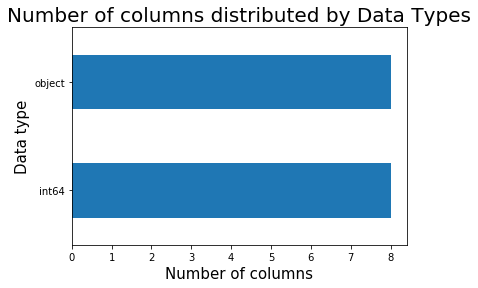

In [58]:
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [59]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
#no of string data in obj variables

job           12
marital        3
education      4
connect        2
landline       2
smart          2
last_month    12
poutcome       4
dtype: int64

In [44]:
df.dtypes

age           int64
job           int32
marital       int32
education     int32
connect       int32
balance       int64
landline      int32
smart         int32
last_day      int64
last_month    int32
duration      int64
campaign      int64
passdays      int64
previous      int64
poutcome      int32
target        int64
dtype: object

In [47]:
df.describe()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,duration,campaign,passdays,previous,poutcome,target
count,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000
mean,40.969488,4.332798,1.167127,1.225067,0.017972,1372.520514,0.554656,0.160709,15.818826,5.515873,257.401229,2.768243,40.218475,0.581144,2.559988,0.115854
std,10.633359,3.272224,0.608499,0.746798,0.132850,3088.652335,0.497010,0.367267,8.321429,3.007043,255.378762,3.092290,100.061376,2.333588,0.988182,0.320053
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1436.250000,1.000000,0.000000,21.000000,8.000000,318.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,58.000000,871.000000,275.000000,3.000000,1.000000
